In [1]:
# Predicting house prices using the k nearest neighbour regression

In [2]:
import graphlab

In [3]:
# Load data

In [4]:
sales = graphlab.SFrame('kc_house_data_small.gl/')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1478105154.log


This non-commercial license of GraphLab Create for academic use is assigned to emechebe@ohsu.edu and will expire on June 11, 2017.


In [5]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3.0,1.0,1180.0,5650,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000,3.0,2.25,2570.0,7242,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000,2.0,1.0,770.0,10000,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000,4.0,3.0,1960.0,5000,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000,3.0,2.0,1680.0,8080,1.0,0
2008000270,2015-01-15 00:00:00+00:00,291850,3.0,1.5,1060.0,9711,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500,3.0,1.0,1780.0,7470,1.0,0
1736800520,2015-04-03 00:00:00+00:00,662500,3.0,2.5,3560.0,9796,1.0,0
9297300055,2015-01-24 00:00:00+00:00,650000,4.0,3.0,2950.0,5000,2.0,0
6865200140,2014-05-29 00:00:00+00:00,485000,4.0,1.0,1600.0,4300,1.5,0


In [6]:
# Here we want to predict price using the k nearest neighbour technique
# That is given a query, we want to calculate a distance metric of our query and each house in the data set
# Then based on the result of the distance metric , we select a k number of houses that are most similar to query
# Then we use thier prices to estimate the price of our query

In [7]:
# Matrix manipulation requires numpy
# Import numpy as np

In [8]:
import numpy as np

In [9]:
# For distance metric, it is always better to use normalized values.
# This is because if the scale of one feature is just larger in magnitude than other features,
# that difference in magnitude might exert an undue influence on the distance score.
# For instance, the no of floors is from a scale of 1 to 10 (hypothetically)
# while sqft is in the thousands. Does that mean that sqft is more important than floor? Well you dont know that.


In [10]:
# There are various ways of normalization.
# The way that we chose to normalize here is to calculate the magnitude of the vector 
# and dividing all the observations by this magnitude.
# Now whats this magnitude we talk about?
# The magnitude of a vector is given by :
# squaring each observation
# Taking the sum of all the squared values
# Then taking the square root and that value is termed as the magnitude of the vector
# We divide all the observations with this value


In [11]:
# So wrote a function that takes a matrix of values and returns normalized values
# Function that takes an array and returns the normalized scores
# A numpy function called linalg.norm returns the magnitude of the vector
# Now I can use it to divide the feature matrix and that will be our normalized data set
# Now write this function called normalize_features
# In this function we did this computation column wise. So we have a norm value for each column (ie for each feature)
# We have 18 features , so our norm matrix will contain 18 values

In [12]:
def normalize_features(feature_matrix):
    # Use the linalg.norm function to return the magnitude of the vector
    # This is done column wise and thus we set the axis to 0
    norms = np.linalg.norm(feature_matrix, axis=0) 
    # Use the norms to now divide all the values by this norm
    features = feature_matrix / norms
    # Return the normalized data and also the norm value that we used to generate 
    return features, norms

    # Note we will use the same norm value to get the normalized value for the test data and validation set

In [13]:
# Split data into training, test, and validation sets

In [14]:
(train_and_validation, test) = sales.random_split(.8, seed=1) # initial train/test split
(train, validation) = train_and_validation.random_split(.8, seed=1) # split training set into training and validation sets

In [15]:
# Extract features and normalize

In [16]:
# Our data is in Sframe and for our data manipulation we need the data to be in array

In [17]:
# Using all of the numerical inputs listed in feature_list, 
# transform the training, test, and validation SFrames into Numpy arrays
# This means I need the get_numpy_data function we wrote

In [18]:
def get_numpy_data(data_sframe, features,output):
    # This function takes a data set(data_sframe), a list of features (features) and what you want to predict as a string.
    # It returns back 2 numpy array that has the measurements of your selected features (feature_matrix)
    #  The other array is what you want to predict (output array)
    # Using the data we have, add a constant variable for intercept and select the features you want to use
    data_sframe['constant'] = 1 # add a constant column to an SFrame. This is for intercept
    features = ['constant'] + features  # Prepending the new constant variable to the features also
    features_sframe = data_sframe[features] # Getting the newly formed user selected features Sframe
    features_matrix = features_sframe.to_numpy() # Converting the features Sframe data to a numpy array data
    output_sarray = data_sframe[output]
    output_array = output_sarray.to_numpy()
    return (features_matrix,output_array)

In [19]:
# I will be using the entire features for prediction

In [20]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']

In [21]:
# Arranging all my data sets into numpy arrays using the get_numpy_data function

In [22]:
features_train, output_train = get_numpy_data(train, feature_list, 'price')
features_test, output_test = get_numpy_data(test, feature_list, 'price')
features_valid, output_valid = get_numpy_data(validation, feature_list, 'price')

In [23]:
# Now the k nearest neighbour involves calculation of distances of query from observations in the data set
# For this you want your data to be all normalized or else a column of data with very large values of measures
# might exert undue influence in the calculations

In [24]:
# Normalize train data
# Return the normalized data and also the norm value

In [25]:
features_train, norms = normalize_features(features_train) # normalize training set features (columns)

In [26]:
# IMPORTANT: Make sure to store the norms of the features in the training set. 
# The features in the test and validation sets must be divided by these same norms, 
# so that the training, test, and validation sets are normalized consistently.

In [27]:
# Now use the norms from training data to normalize our test data

In [28]:
features_test = features_test / norms

In [29]:
# Also , use the norms from training data to normalize our validation data

In [30]:
features_valid = features_valid / norms 

In [31]:
# Now we have normalized values, we can now start calculating distances 

In [32]:
# Lets compute the distance between just two houses
# Lets use the query house as the first house in the test data set
# And the subject is the 10th house in the training

In [33]:
# Lets take a look at the first house (ie query)

In [34]:
features_test[0]

array([ 0.01345102,  0.01551285,  0.01807473,  0.01759212,  0.00160518,
        0.017059  ,  0.        ,  0.05102365,  0.0116321 ,  0.01564352,
        0.01362084,  0.02481682,  0.01350306,  0.        ,  0.01345386,
       -0.01346927,  0.01375926,  0.0016225 ])

In [35]:
# Lets take a look at the 10th house 

In [36]:
features_train[9]

array([ 0.01345102,  0.01163464,  0.00602491,  0.0083488 ,  0.00050756,
        0.01279425,  0.        ,  0.        ,  0.01938684,  0.01390535,
        0.0096309 ,  0.        ,  0.01302544,  0.        ,  0.01346821,
       -0.01346254,  0.01195898,  0.00156612])

In [37]:
# What is the Euclidean distance between the query house and the 10th house of the training set?

In [38]:
# The formula for Euclidean distance is :
# Get the difference between each observation for each feature
# Square those differences to get rid of direction
# Then sum over all the squared diffences
# Finally take the square root of the sum of the squared differences
# The value you get is an indication of how similar house 1 is to house 10 using the Euclidean distance as a measure

In [39]:
# Getting the difference

In [40]:
Difference = features_test[0] - features_train[9]

In [41]:
Difference

array([  0.00000000e+00,   3.87821276e-03,   1.20498190e-02,
         9.24331842e-03,   1.09762322e-03,   4.26475103e-03,
         0.00000000e+00,   5.10236549e-02,  -7.75473450e-03,
         1.73816863e-03,   3.98994223e-03,   2.48168183e-02,
         4.77622244e-04,   0.00000000e+00,  -1.43460647e-05,
        -6.72204960e-06,   1.80027678e-03,   5.63818921e-05])

In [42]:
# Squaring the differences

In [43]:
Squared_Differences = Difference ** 2

In [44]:
Squared_Differences

array([  0.00000000e+00,   1.50405342e-05,   1.45198139e-04,
         8.54389355e-05,   1.20477673e-06,   1.81881013e-05,
         0.00000000e+00,   2.60341336e-03,   6.01359072e-05,
         3.02123018e-06,   1.59196390e-05,   6.15874470e-04,
         2.28123008e-07,   0.00000000e+00,   2.05809573e-10,
         4.51859508e-11,   3.24099649e-06,   3.17891776e-09])

In [45]:
# Summing over all squared differences

In [46]:
Sum_of_squared_differences = np.sum(Squared_Differences)

In [47]:
Sum_of_squared_differences

0.0035669076464328198

In [48]:
# Taking the square root to get the Euclidean distance between the two houses

In [49]:
Euclidean_distance = np.sqrt(Sum_of_squared_differences)

In [50]:
Euclidean_distance 

0.059723593716661257

In [51]:
# Ok this was just computing one distance.
# We now want to compute multiple distances (ie query versus more than one house)

In [52]:
# Of course, to do nearest neighbor regression, 
# we need to compute the distance between our query house and all houses in the training set.

In [53]:
# To visualize this nearest-neighbor search, 
# let's first compute the distance from our query house (features_test[0]) 
# to the first 10 houses of the training set (features_train[0:10]) 
# and then search for the nearest neighbor within this small set of houses. 
# Through restricting ourselves to a small set of houses to begin with, 
# we can visually scan the list of 10 distances to verify that our code for finding the nearest neighbor is working.

In [54]:
# Write a loop to compute the Euclidean distance from the query house 
# to each of the first 10 houses in the training set.

In [55]:
def Euclidean_distance():
    for i in xrange(10):
        Difference = features_test[0] - features_train[i]
        Squared_Differences = Difference ** 2
        Sum_of_squared_differences = np.sum(Squared_Differences)
        Euclidean_distance = np.sqrt(Sum_of_squared_differences)
        print Euclidean_distance, i

In [56]:
Euclidean_distance()

0.060274709173 0
0.0854688114883 1
0.0614994643712 2
0.0534027397882 3
0.0584448406394 4
0.0598792151018 5
0.0546314049726 6
0.0554310832416 7
0.052383627841 8
0.0597235937167 9


In [57]:
# Ninth house seems to be the closest house to the query

In [58]:
# Now that worked!
# We set up a loop that went through the computation element by element
# i.e features_test[0] - features_test[i]
# For small data set, thats fine. For big data set that can be computationally expensive.
# Luckily we can perform operations on whole vectors using Numpy,
# as opposed to going through the vector row by row

In [59]:
# For instance, lets say we want the difference between query house and the first ten houses
# Instead of going by loop, like we did last time
# we just take the entire vector of the query and subtract from the entire vector of query

In [60]:
Differences = features_train[0:10] - features_test[0]

In [61]:
Differences

array([[  0.00000000e+00,  -3.87821276e-03,  -1.20498190e-02,
         -1.05552733e-02,   2.08673616e-04,  -8.52950206e-03,
          0.00000000e+00,  -5.10236549e-02,   0.00000000e+00,
         -3.47633726e-03,  -5.50336860e-03,  -2.48168183e-02,
         -1.63756198e-04,   0.00000000e+00,  -1.70072004e-05,
          1.30577772e-05,  -5.14364795e-03,   6.69281453e-04],
       [  0.00000000e+00,  -3.87821276e-03,  -4.51868214e-03,
         -2.26610387e-03,   7.19763456e-04,   0.00000000e+00,
          0.00000000e+00,  -5.10236549e-02,   0.00000000e+00,
         -3.47633726e-03,   1.30705004e-03,  -1.45830788e-02,
         -1.91048898e-04,   6.65082271e-02,   4.23240653e-05,
          6.22415897e-06,  -2.89330197e-03,   1.47606982e-03],
       [  0.00000000e+00,  -7.75642553e-03,  -1.20498190e-02,
         -1.30002801e-02,   1.60518166e-03,  -8.52950206e-03,
          0.00000000e+00,  -5.10236549e-02,   0.00000000e+00,
         -5.21450589e-03,  -8.32384500e-03,  -2.48168183e-02,
      

In [62]:
results = features_train[0:3] - features_test[0]

In [63]:
print results[2] - (features_train[2]-features_test[0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [64]:
# So what we have now is the same thing we would have if we set a for loop
# and go through each vector row by row and compute differences
# This is way easy as we just do it in one line of code
# and more importantly, it is faster

In [65]:
# Perform 1 nearest neighbour regression

In [66]:
# Now we have to calculate the difference of two vectors using Numpy
# So lets get the difference between our query and all the house in the training data set
# Lets call this the DifferenceMatrix

In [67]:
DifferenceMatrix = features_train - features_test[0]

In [68]:
DifferenceMatrix

array([[  0.00000000e+00,  -3.87821276e-03,  -1.20498190e-02, ...,
          1.30577772e-05,  -5.14364795e-03,   6.69281453e-04],
       [  0.00000000e+00,  -3.87821276e-03,  -4.51868214e-03, ...,
          6.22415897e-06,  -2.89330197e-03,   1.47606982e-03],
       [  0.00000000e+00,  -7.75642553e-03,  -1.20498190e-02, ...,
          1.56530415e-05,   3.72914476e-03,   1.64764925e-03],
       ..., 
       [  0.00000000e+00,  -3.87821276e-03,  -3.01245476e-03, ...,
          5.43940273e-05,   8.35842791e-04,   7.02137088e-04],
       [  0.00000000e+00,   0.00000000e+00,  -3.01245476e-03, ...,
          2.28925105e-05,   2.44323277e-03,   8.20579624e-04],
       [  0.00000000e+00,  -3.87821276e-03,  -3.01245476e-03, ...,
          3.22568982e-06,  -3.92203156e-03,  -1.01041218e-03]])

In [69]:
# Now that we have all the differences, we can now go on and calculate the Euclidean distance 
# of our query to all the houses in our data set by just taking the square of the differences
#taking the sum of the squared differences and then taking the square root of this sum

In [70]:
# Lets take the sum of the last row in our difference matrix.
# This is a check to see if our code is working


In [71]:
print DifferenceMatrix[-1].sum()

-0.0934339605842


In [72]:
# It returned the expected result, so proceed with programming assignment.

In [73]:
# So onto getting the Euclidean distance from the DistanceMatrix we just calculated
# First we square the Differences to remove direction

In [74]:
Squared_Differences = DifferenceMatrix ** 2

In [75]:
# Then we take the sum of the Squared differences and we do this row by row 
# Thus our result will be a 1D vector whose len is equal to the len of the data set

In [76]:
Sum_Squared_Differences = np.sum(Squared_Differences, axis = 1)

In [77]:
# Now we can take the square root to get the Euclidean distance

In [78]:
Euclidean_distance = np.sqrt(Sum_Squared_Differences)

In [79]:
# Now lets test our computation by looking at the distance between our query and our 100th house in the training
# The value should be 0.0237..

In [80]:
Euclidean_distance[100] 

0.023708232449603735

In [81]:
# Everything seems to check out

In [82]:
# Now you are ready to write a function that computes the distances from a query house to all training houses. 
# The function should take two parameters: 
# (i) the matrix of training features and (ii) the single feature vector associated with the query.

In [83]:
# So lets modify our Euclidean_distance to Euclidean_distanceV1

In [84]:
def Euclidean_distanceV1(FeatureMatrix, Query):
        # Get the difference between your query house and each house in the data set
        Difference = FeatureMatrix - Query
        # Square those differences
        Squared_Differences = Difference ** 2
        # Get the sum of squared differences
        # You want to get sum row by row for each house ; hence setting the axis 
        Sum_of_squared_differences = np.sum(Squared_Differences, axis=1)
        # Get the Euclidean distance by taking the square root of the sum of squared differences
        Euclidean_distance = np.sqrt(Sum_of_squared_differences)
        return Euclidean_distance
        

In [85]:
Result=Euclidean_distanceV1(features_train,features_test[0] )

In [86]:
# Test to make sure my function works

In [87]:
Result[100]

0.023708232449603735

In [88]:
# Quiz: Take the query house to be third house of the test set (features_test[2])

In [89]:
Result=Euclidean_distanceV1(features_train,features_test[2] )

In [90]:
# Seems to work.
# Our function returns back the Euclidean_distance
# For 1-NN search, all we need to do is to return the house closest to our query
# This means returning the house with the smallest distance in our Euclidean_distance result

In [91]:
# So lets get the minimum value of our result

In [92]:
min(Result)

0.0028604952675079271

In [93]:
# Lets also get the most important piece which is the index of that minimum
# That tells us the exact house that gave this min

In [94]:
Result.argmin()

382

In [95]:
# Lets return the indices of the 5 most similar houses

In [96]:
Result.argsort()[:5]

array([ 382, 1149, 4087, 3142, 2751])

In [97]:
# Now lets use this index to find the price of the house and that will be the prediction of our query

In [98]:
# Remenber when we used out get_ numpy function we returned two data:
# One is the matrix we will use for prediction and the other is a vector
# that contains the actual values of what we are trying to predict
# In our case it is price and the data relevant to this analysis is the 
# output_train data which contains prices that match the houses in the features_train data set
# All we have to do now is to find the 382th member and whatever that price is 
# becomes our predicted price for the query

In [99]:
print output_train[382]

249000


In [100]:
# Voila!!!! This is our prediction: 249000

In [101]:
# So based on this, we can update our Euclidean_distanceV1 to do all this computation and return for us:
# 1) The Minimum distance calculated
# 2) The index of the Minimum distance
# 3) The price attached to this index
# However to do this we have to add one more input to the function : The output_array
# This contains all the prices of the house and we will use it for predictions
# We call this function Euclidean_distanceV2

In [102]:
def Euclidean_distanceV2(FeatureMatrix, Query,Output_array):
        # Get the difference between your query house and each house in the data set
        Difference = FeatureMatrix - Query
        # Square those differences
        Squared_Differences = Difference ** 2
        # Get the sum of squared differences
        # You want to get sum row by row for each house ; hence setting the axis 
        Sum_of_squared_differences = np.sum(Squared_Differences, axis=1)
        # Get the Euclidean distance by taking the square root of the sum of squared differences
        Euclidean_distance = np.sqrt(Sum_of_squared_differences)
        
        # Save minimum of Euclidean distance (Thats the minimum distance available)
        MinimumDistance = min(Euclidean_distance)
        
        # Get the index of the minimum house in the array
        Index_of_Minimum = Euclidean_distance.argmin()
        
        # Use that index to find the price of the house in the price array. This is called the Output_array
        # in this function
        Price = Output_array[Index_of_Minimum]
        
        # Now we print the results which includes
        # 1) The Minimum distance calculated
        # 2) The index of the Minimum distance
        # 3) The price attached to this index
        print MinimumDistance,Index_of_Minimum,Price

In [103]:
Euclidean_distanceV2(features_train, features_test[2],output_train)

0.00286049526751 382 249000


In [104]:
# Now we have this function that takes three inputs and returns 
# the euclidean distance of the most similar house
# the index of the most similar house
# and the price of that house

In [105]:
# So in summary, we took a query and a set of data
# we calculated the euclidean distance of our query from each of the houses in our data set
# then we found the most similar house to our query by finding the minimum distance
# We then used that house to predict the price of our query house
# This is basically the 1-NN search

In [106]:
# Now lets do a K-NN search

In [107]:
# This is conceptually the same with the 1-NN search
# The difference here is that instead of returning the MOST similar house, we return a group of similar HOUSES.
# The number of houses in the group is determined by the user and thats what the K stands for 
# So we will just have to modify our Euclidean_distanceV2 function 
# Instead of returning just one similar house
# we return a k number of similar houses.
# The k will be a parameter that the user will have to decide on


In [108]:
# I had initially wanted to set up a for loop to through the Euclidean_distance
# and in iteration do two things
# One find the min
# Save the index of that min in a list
# Delete that from the array
# and then find the next minimal value and repeat the process again
# Repeat that k times.
# That will work and you will get a list of k minimum values
# However, the problem is in the indices which should match the indices of the original array
# Our returned indices would not match because everytime we remove an item from the array,
# the indexing is changed

In [109]:
# So I just resorted to using the numpy argument that returns the indices
# of a k number of minimum items in an array i.e Result.argsort()[:5]
# So I just modified the function Euclidean_distanceV2 to reflect that 
# and I called this modified function Euclidean_distanceKNN

In [110]:
def Euclidean_distanceKNN(FeatureMatrix, Query,k):
        # Get the difference between your query house and each house in the data set
        Difference = FeatureMatrix - Query
        # Square those differences
        Squared_Differences = Difference ** 2
        # Get the sum of squared differences
        # You want to get sum row by row for each house ; hence setting the axis 
        Sum_of_squared_differences = np.sum(Squared_Differences, axis=1)
        # Get the Euclidean distance by taking the square root of the sum of squared differences
        Euclidean_distance = np.sqrt(Sum_of_squared_differences)
        
        # Get the index of the 5 minimum house in the array
        Index_of_Minimum = Euclidean_distance.argsort()[:k]
        
        return Index_of_Minimum
        
       

In [111]:
# Lets test our new function that takes 3 parameters
# the value of k;
# the feature matrix for the training houses; and
# the feature vector of the query house

In [112]:
Euclidean_distanceKNN(features_train,features_test[2] ,5)

array([ 382, 1149, 4087, 3142, 2751])

In [113]:
# Quiz:
# Take the query house to be third house of the test set (features_test[2]). 
# What are the indices of the 4 training houses closest to the query house?

In [114]:
KNN=Euclidean_distanceKNN(features_train,features_test[2] ,4)

In [115]:
# Ok we now know how to return the indices of the most similar houses to our query
# We can then use the prices of these similar houses to predict the price of our query house
# There are many ways to do that and one simple way is just take the average of the prices of the most similar house
# That average is then returned as the prediction for our query house
# Now let modify our ...KNN function to do all this and return the predicted value 
# based on the average of the most similar house
# We call this function Euclidean_distanceKNNv1 
# Oh we also add the output array that we are going to use for prediction

In [116]:
def Euclidean_distanceKNNv1(FeatureMatrix, QueryMatrix,k,Output_array):
        # Get the difference between your query house and each house in the data set
        Difference = FeatureMatrix - QueryMatrix
        # Square those differences
        Squared_Differences = Difference ** 2
        # Get the sum of squared differences
        # You want to get sum row by row for each house ; hence setting the axis 
        Sum_of_squared_differences = np.sum(Squared_Differences, axis=1)
        # Get the Euclidean distance by taking the square root of the sum of squared differences
        Euclidean_distance = np.sqrt(Sum_of_squared_differences)
        
        # Get the index of the 5 minimum house in the array
        Index_of_Minimum = Euclidean_distance.argsort()[:k]
        
        # Getting the prices of k similar houses
        Prices=Output_array[[Index_of_Minimum]]
        
        # Getting the average of these prices as prediction for our query house
        Prediction = np.mean(Prices)
        
        return Prediction
        
        

In [117]:
# Quiz:
# Again taking the query house to be third house of the test set (features_test[2]), 
# predict the value of the query house using k-nearest neighbors with k=4 
# and the simple averaging method described and implemented above.

In [118]:
Euclidean_distanceKNNv1(features_train,features_test[2] ,4,output_train)

413987.5

In [119]:
# Pretty good huh! 
# The limitation of this function is that it only predicts one house
# That is it takes the observations for just one house as query
# and then goes through all our data set and find k most similar houses to our query
# and then using the prices of the k most similar houses predicts the price of our query
# Now what of if we have a set of houses that we need to predict
# Well, we can use this function and do our prediction one by one for each house in our query set
# That would work. However, it will even be better if we modified the function so that it does it for us
# My fix for this is just to set up a for loop that will go through a vector and extract the 
# items in that vector one by one. In our case, this represents each houses in the query set
# Once we can get each house one by one, then inside the for loop will just be the same computations
# which will result in the predictions

In [120]:
# So for just one single house in a query looks like this:

In [121]:
features_test[2]

array([ 0.01345102,  0.01163464,  0.01054359,  0.00906442,  0.00204821,
        0.0085295 ,  0.        ,  0.        ,  0.0116321 ,  0.01216718,
        0.00543458,  0.01867657,  0.01329154,  0.        ,  0.01348883,
       -0.01346136,  0.00977293,  0.00252907])

In [122]:
# Another example of just one query

In [123]:
features_test[3]

array([ 0.01345102,  0.01163464,  0.00602491,  0.00650014,  0.00096311,
        0.01279425,  0.        ,  0.        ,  0.01550947,  0.01390535,
        0.00749834,  0.        ,  0.0131619 ,  0.        ,  0.0134871 ,
       -0.01346925,  0.01009441,  0.00206058])

In [124]:
# In both of these cases, we can use our function Euclidean_distanceKNNv1 
# cos we are dealing with just one query

In [125]:
# Now this is an example of a query that contains 2 houses extracted from our feature_test 

In [126]:
Query = features_test[2:4,:]

In [127]:
Query

array([[ 0.01345102,  0.01163464,  0.01054359,  0.00906442,  0.00204821,
         0.0085295 ,  0.        ,  0.        ,  0.0116321 ,  0.01216718,
         0.00543458,  0.01867657,  0.01329154,  0.        ,  0.01348883,
        -0.01346136,  0.00977293,  0.00252907],
       [ 0.01345102,  0.01163464,  0.00602491,  0.00650014,  0.00096311,
         0.01279425,  0.        ,  0.        ,  0.01550947,  0.01390535,
         0.00749834,  0.        ,  0.0131619 ,  0.        ,  0.0134871 ,
        -0.01346925,  0.01009441,  0.00206058]])

In [128]:
# Looking this shows an array of 2 rows, with each row containing 18 columns
# With respect to our examples, each row represents a house and 18 features of the house

In [129]:
# We can use the .shape function in numpy to determine the diimensions of our vector

In [130]:
Query.shape

(2, 18)

In [131]:
# That shows correctly that we have 2 houses with each house containing 18 features

In [132]:
# To go through the houses one by one , we can just use a for loop:

In [133]:
for i in xrange(len(Query)):
    print New[i]

NameError: name 'New' is not defined

In [134]:
# We modify our Euclidean_distanceKNNv1 by just adding a loop that will go through 
# the individual houses in the query set . In each for loop, we just do the computation to get the predictions as usual
# We call this Euclidean_distanceKNNv2

In [135]:
def Euclidean_distanceKNNv2(FeatureMatrix, QueryMatrix,k,Output_array):
        Predictions = []
        for i in xrange(len(QueryMatrix)):
            Query = QueryMatrix[i]
            #print Query  # Lets print each of the query to make sure that we are looking at each house with the right
                         # features
            
            # Once we are sure that the houses are being accessed correctly in the query set,
            # we can now go ahead and do our regular computation that will return the prediction
            # Get the difference between your query house and each house in the data set
            Difference = FeatureMatrix - Query
            # Square those differences
            Squared_Differences = Difference ** 2
            # Get the sum of squared differences
            # You want to get sum row by row for each house ; hence setting the axis 
            Sum_of_squared_differences = np.sum(Squared_Differences, axis=1)
            # Get the Euclidean distance by taking the square root of the sum of squared differences
            Euclidean_distance = np.sqrt(Sum_of_squared_differences)
        
            # Get the index of the 5 minimum house in the array
            Index_of_Minimum = Euclidean_distance.argsort()[:k]
        
            # Getting the prices of k similar houses
            Prices=Output_array[[Index_of_Minimum]]
        
            # Getting the average of these prices as prediction for our query house
            Prediction = np.mean(Prices)
            
            #print Prediction
        
            Predictions.append(Prediction)
        
        return Predictions

In [136]:
# Now lets take this for a ride and test it out
# Our houses that we want the predictions for are houses 2 and 3 in the feature_test matrix
# So we specify that as features_test[2:4,]
# Everything else remains the same in terms of input

In [137]:
Euclidean_distanceKNNv2(features_train,features_test[2:4,] ,4,output_train)

[413987.5, 552750.0]

In [138]:
# Great!
# We have printed the results of the function
# We have the observations for each house printed and below it we have the predicted price

In [139]:
# This works great.....except if we give it a query with just one house. 
# Now this where my lack of knowledge in data structures comes to haunt me
# A one house query with this function results in the for loop going through
# the features of the house one by one and thats not what we want
# Below is an example:

In [140]:
Euclidean_distanceKNNv2(features_train,features_test[2] ,4,output_train)

[583875.0,
 504625.0,
 467000.0,
 336087.5,
 242750.0,
 312850.0,
 196500.0,
 196500.0,
 504625.0,
 526375.0,
 195000.0,
 713250.0,
 521125.0,
 196500.0,
 583875.0,
 218750.0,
 323850.0,
 242750.0]

In [141]:
# Yikes! This is just one house and it should just give me the prediction of that house
# But the for loop interprets the features of that house (wehich is 18 by the way) as separate 
# and does computation for each of them

In [142]:
# Instead of having one function that computes prediction for one house and a different function that computes
# predictions for a bunch of houses, I decided to combine both functions as one.
# All I have to do is to find a way to determine if my query matrix is just a 1D vector which means just one house in 
# in the query set or is it more than a 1D vector which means we have more than one house in the query set
# To discriminate from this two possibilites, I took advantage of the .ndim function
# .ndim returns the dimension of a vector
# So if it returns 1, it means that you only have 1D . Other than that, it means more than 1D
# An instance:

In [143]:
Query2.ndim

NameError: name 'Query2' is not defined

In [144]:
Query.ndim

2

In [145]:
# So i will modify the function and call it Euclidean_distanceKNNv3.
# What it does is simple:
# First it will ask if your vector is a 1D or not
# If it is a 1D, then we just the function that deals with just one house in the query set (Euclidean_distanceKNNv1)
# Else, we now assume that we have more than one house in the query set, and in that case
# we call the other function that handles multiple predictions

In [146]:
def Euclidean_distanceKNNv3(FeatureMatrix, QueryMatrix,k,Output_array):
    
    # Calculate dimensions of the QueryMatrix
    Dimension = QueryMatrix.ndim
 
    # Use that answer to determine what function to run
    
    if Dimension == 1:
        # This means we only have one house in our query set
        # Then run the function that works on only one house in the query
        Prediction = Euclidean_distanceKNNv1(FeatureMatrix, QueryMatrix,k,Output_array)
    else:
        # This means now that we have a matrix with more than one house in the query set
        # So we run the function for more than a house in the query set
        Prediction = Euclidean_distanceKNNv2(FeatureMatrix, QueryMatrix,k,Output_array)
    
    return Prediction

In [147]:
Euclidean_distanceKNNv3(features_train,features_test[2] ,4,output_train)

413987.5

In [148]:
Euclidean_distanceKNNv3(features_train,features_test[2:4,:] ,4,output_train)

[413987.5, 552750.0]

In [149]:
# Quiz: Make predictions for the first 10 houses in the test set using k-nearest neighbors with k=10.

In [150]:
Euclidean_distanceKNNv3(features_train,features_test[0:10,:] ,10,output_train)

[881300.0,
 431860.0,
 460595.0,
 430200.0,
 766750.0,
 667420.0,
 350032.0,
 512800.70000000001,
 484000.0,
 457235.0]

In [151]:
# Quiz: What is the index of the house in this query set that has the lowest predicted value?

In [152]:
# Answer : Number 6

In [153]:
# Quiz: What is the predicted value of this house?

In [154]:
# $350032.0

In [155]:
# This is pretty good
# However, you can see in the first analysis I used 1 as the NN...subsequently I used 4 as my k
# In the last analysis I used 10 as my k. 
# This begs the question....what is the right k to use????
# That is determined empirically.
# Thats why we have our training data set split into two: training and validation

In [175]:
# So to determine what k might be good, we predict the prices of all the houses in our validation set
# using our training data set. We do this predictions for a range of k (eg set k to be from 1 to 15 or something)
# So we now have all the predictions from all the different k.
# The question now is which one is the most accurate of all
# We will use the residual sum of squares as a measure of accuracy
# To calculate the RSS, we have to save all the predictions in an array
# Then get the difference between the predictions and the actual prices
# Square them to get rid of signs
# Take the sum of the squares and thats your RSS
# You do that for all k's and then return the k that gives the minimal RSS

In [176]:
# Lets first write a function that uses just one k,
# Predicts prices based on this k
# Calculates the RSS
# Returns that value
# We call that function best_k_finder

In [177]:
def best_k_finder(FeatureMatrix, QueryMatrix,k,Output_array, Actual_Prices):
    
    # Lets first predict all the validation set from all the training set, setting k as 1
    Prediction = Euclidean_distanceKNNv2(FeatureMatrix, QueryMatrix,k,Output_array)
    
    # Now that we have the predictions, we want to know how well our predictions did
    # To do this we need to compute the RSS
    # So first get the difference between our predictions and the actual prices we are trying to predict
    # in our validation set
    
    Difference = Prediction - Actual_Prices
    
    # Get the squared difference
    Squared_Difference = Difference ** 2
    
    # Get the sum of the squared difference
    
    RSS = Squared_Difference.sum()
    
    return RSS


   
    
    

In [178]:
# Testing it out with k set as 1

In [179]:
Predictions=best_k_finder(features_train,features_valid,1,output_train , output_valid )

In [180]:
Predictions

105453830251561.0

In [181]:
# Now we have a function that calculates the RSS for one particular k
# All we have to do now is to set a loop that will calculate the RSS for a range of k's
# Lets print all the RSS as we calculate it
# All we have to do is to modify our best_k_finder and make it loop through a range of k's
# In each loop, it does the same computation and then prints the RSS before going to the next k
# We call this best_k_finder2

In [182]:
def best_k_finder2(FeatureMatrix, QueryMatrix,k,Output_array, Actual_Prices):
    
    for i in xrange(k):
    
        print (i)
         # Lets first predict all the validation set from all the training set, setting k as 1
        Prediction = Euclidean_distanceKNNv2(FeatureMatrix, QueryMatrix,i+1,Output_array)
    
         # Now that we have the predictions, we want to know how well our predictions did
         # To do this we need to compute the RSS
        # So first get the difference between our predictions and the actual prices we are trying to predict
        # in our validation set
    
        Difference = Prediction - Actual_Prices
    
        # Get the squared difference
        Squared_Difference = Difference ** 2
    
        # Get the sum of the squared difference
    
        RSS = Squared_Difference.sum()
    
        print (RSS)

In [184]:
# Lets take it for a ride

In [185]:
Predictions=best_k_finder2(features_train,features_valid,5,output_train , output_valid )

0
1.05453830252e+14
1
8.3445073504e+13
2
7.26920960192e+13
3
7.19467216521e+13
4
6.98465174197e+13


In [186]:
# Cool. However, we dont to just print all the RSS.
# What we really want is to return the min RSS and the k vlaue that gave us this RSS
# So again, lets modify our functiion to do this
# We call this best_k_finder3

In [187]:
def best_k_finder3(FeatureMatrix, QueryMatrix,k,Output_array, Actual_Prices):
    
    RSS_List = []
    for i in xrange(k):
    
        #print (i)
         # Lets first predict all the validation set from all the training set, setting k as 1
        Prediction = Euclidean_distanceKNNv2(FeatureMatrix, QueryMatrix,i+1,Output_array)
    
         # Now that we have the predictions, we want to know how well our predictions did
         # To do this we need to compute the RSS
        # So first get the difference between our predictions and the actual prices we are trying to predict
        # in our validation set
    
        Difference = Prediction - Actual_Prices
    
        # Get the squared difference
        Squared_Difference = Difference ** 2
    
        # Get the sum of the squared difference
    
        RSS = Squared_Difference.sum()
    
        RSS_List.append(RSS)
    
    MinimumRSS = min(RSS_List)
    Index = RSS_List.index(MinimumRSS)
    print (MinimumRSS)
    print (RSS_List)
    print Index + 1
    return RSS_List

In [188]:
# Lets test it out

In [189]:
Predictions=best_k_finder3(features_train,features_valid,5,output_train , output_valid )

6.98465174197e+13
[105453830251561.0, 83445073504025.5, 72692096019202.562, 71946721652091.688, 69846517419718.602]
5


In [190]:
Predictions

[105453830251561.0,
 83445073504025.5,
 72692096019202.562,
 71946721652091.688,
 69846517419718.602]

In [191]:
# So instead of returning the minimal RSS and the index, we can just plot it
# We have saved all the RSS in the variable called Predictions
# And we know th range of the k that we used
# So we can plot the all the RSS versus the k values
# The matplot function does that

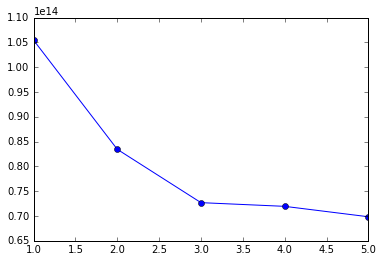

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline

kvals = range(1, 6)
plt.plot(kvals, Predictions,'bo-')

In [ ]:
# Lets repeat this using 15 as k value

In [193]:
Predictions=best_k_finder3(features_train,features_valid,15,output_train , output_valid )

6.73616787355e+13
[105453830251561.0, 83445073504025.5, 72692096019202.562, 71946721652091.688, 69846517419718.602, 68899544353180.836, 68341973450051.094, 67361678735491.5, 68372727958976.094, 69335048668556.742, 69523855215598.828, 69049969587246.172, 70011254508263.688, 70908698869034.344, 71106928385945.156]
8


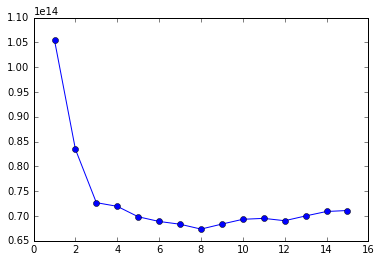

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

kvals = range(1, 16)
plt.plot(kvals, Predictions,'bo-')

In [195]:
# What is the RSS on the TEST data using the value of k found above? To be clear, sum over all houses in the TEST set.

In [196]:
Predictions=best_k_finder(features_train,features_test,8,output_train , output_test )

In [197]:
Predictions

133118823551516.81